In [1]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input

Loading Model

In [2]:
# Load trained VGG16-based model
model = tf.keras.models.load_model('trained_model_vgg16.keras')

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 27,692,612
Trainable params: 12,977,924
No

Visualizaing Single Image of Test set


In [4]:
class_names = ['Bacterialblight', 'Blast', 'Brownspot', 'Tungro']  # Ensure this matches your training dataset

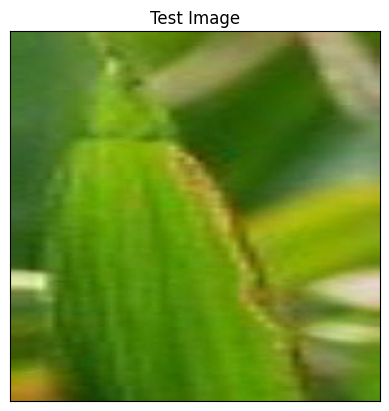

In [6]:
# Load and preprocess the image
image_path = "test/Bacterialblight/BACTERIALBLIGHT_001.jpg"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR image to RGB

# Display the original image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

Testing  Model

In [7]:
# Preprocess image for VGG16
image_resized = cv2.resize(img, (224, 224))  # Resize to (224, 224) for VGG16
image_array = np.array(image_resized, dtype=np.float32)  # Convert to float32
image_array = np.expand_dims(image_array, axis=0)  # Expand dimensions to match model input shape
image_array = preprocess_input(image_array)  # Normalize image using VGG16 preprocessing


In [8]:
# Predict using the model
prediction = model.predict(image_array)
prediction,prediction.shape

1/1 [==============================] - 6s 6s/step


(array([[1.0000000e+00, 3.1698363e-28, 2.1669954e-31, 1.8348450e-23]],
       dtype=float32),
 (1, 4))

In [9]:
# Get the predicted class index and name
result_index = np.argmax(prediction)
model_prediction = class_names[result_index]

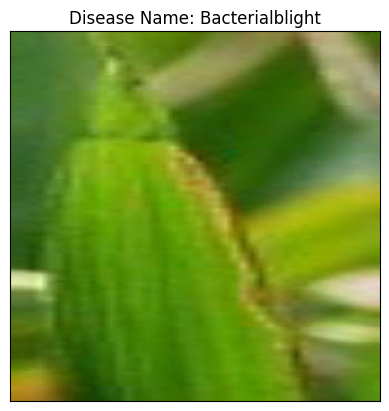

In [10]:
# Displaying Result of Disease Prediction
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()


In [11]:
# Print confidence scores
print(f"Predicted Class: {model_prediction}")
print(f"Confidence Scores: {prediction}")

Predicted Class: Bacterialblight
Confidence Scores: [[1.0000000e+00 3.1698363e-28 2.1669954e-31 1.8348450e-23]]
